Practicas de Economy of the United States

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv('C:/Users/se302/Documents/PROGRAMACION/Ciencia de datos/doc/Economy of the United States.csv')

In [24]:
df.dtypes

Year                                 int64
GDP (in Bil. US$PPP)               float64
GDP per capita (in US$ PPP)        float64
GDP (in Bil. US$nominal)           float64
GDP per capita (in US$ nominal)    float64
GDP growth (real)                   object
Inflation rate (in Percent)         object
Unemployment (in Percent)           object
Government debt (in % of GDP)       object
dtype: object

In [34]:
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Columnas: {df.columns.tolist()}")
print(f"Shape: {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())



=== INFORMACIÓN DEL DATASET ===
Columnas: ['Year', 'GDP (in Bil. US$PPP)', 'GDP per capita (in US$ PPP)', 'GDP (in Bil. US$nominal)', 'GDP per capita (in US$ nominal)', 'GDP growth (real)', 'Inflation rate (in Percent)', 'Unemployment (in Percent)', 'Government debt (in\xa0% of GDP)']
Shape: (48, 9)

Primeras 5 filas:
   Year  GDP (in Bil. US$PPP)  GDP per capita (in US$ PPP)  \
0  1980                2857.3                      12552.9   
1  1981                3207.0                      13948.7   
2  1982                3343.8                      14405.0   
3  1983                3634.0                      15513.7   
4  1984                4037.7                      17086.4   

   GDP (in Bil. US$nominal)  GDP per capita (in US$ nominal)  \
0                    2857.3                          12552.9   
1                    3207.0                          13948.7   
2                    3343.8                          14405.0   
3                    3634.0                        

=== COLUMNAS REALES ===
['Year', 'GDP (in Bil. US$PPP)', 'GDP per capita (in US$ PPP)', 'GDP (in Bil. US$nominal)', 'GDP per capita (in US$ nominal)', 'GDP growth (real)', 'Inflation rate (in Percent)', 'Unemployment (in Percent)', 'Government debt (in\xa0% of GDP)']

=== LIMPIANDO DATOS ===
✅ GDP growth (real) convertido a numérico
✅ Inflation rate (in Percent) convertido a numérico
✅ Unemployment (in Percent) convertido a numérico

=== VERIFICANDO VALORES EXTREMOS ===

=== GENERANDO BOXPLOTS MEJORADOS ===


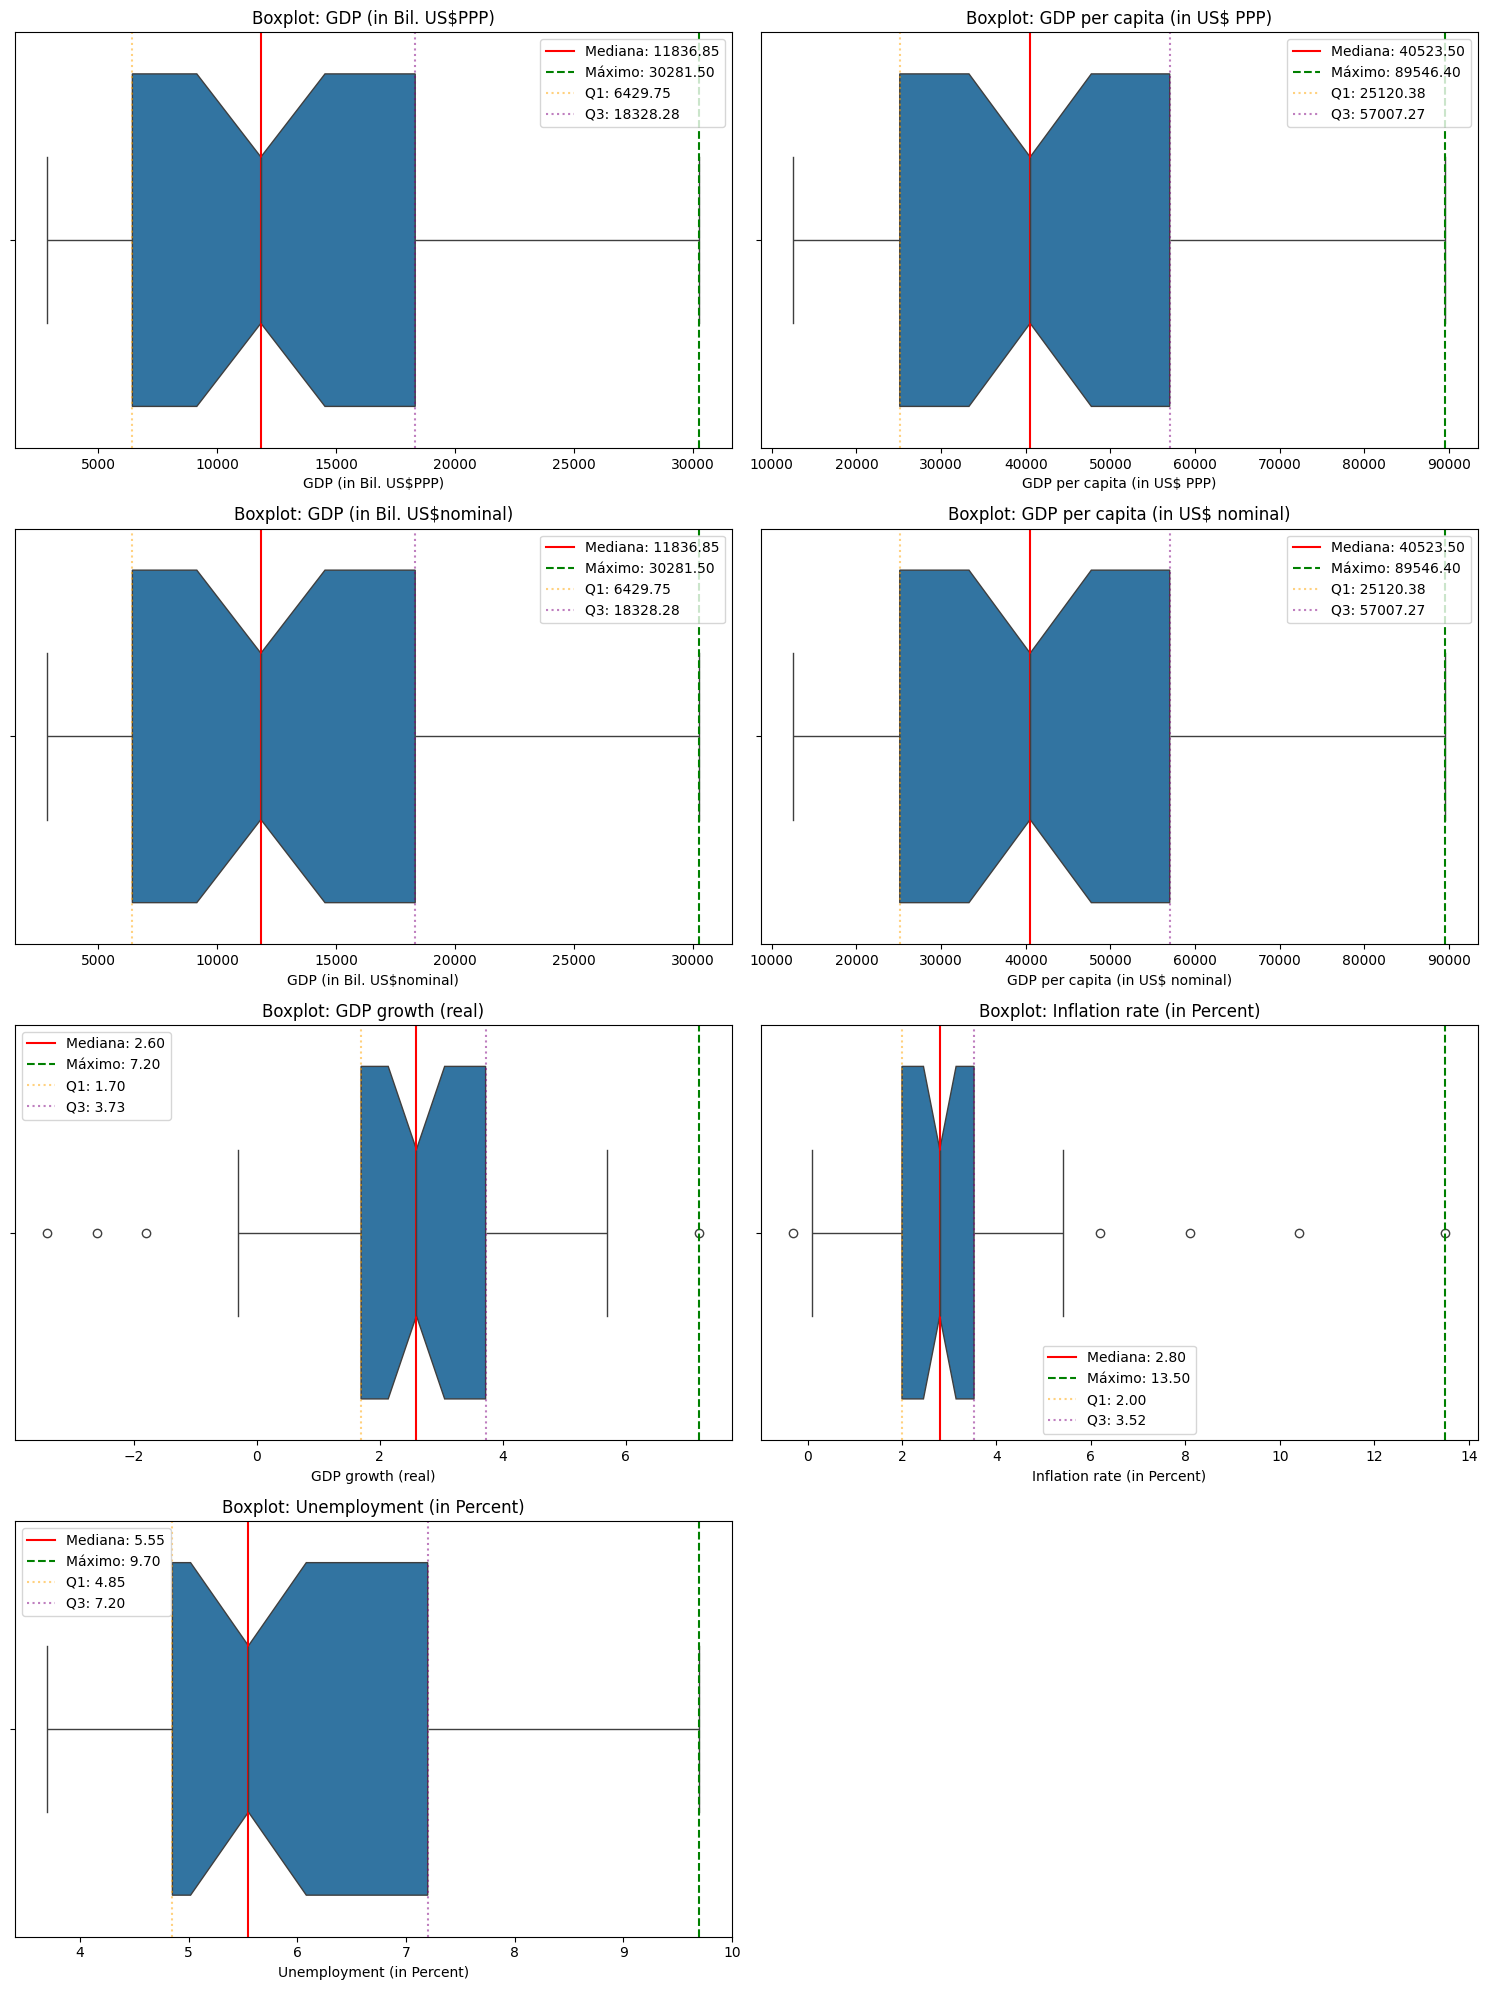


=== ESTADÍSTICAS FINALES ===
          Year  GDP (in Bil. US$PPP)  GDP per capita (in US$ PPP)  \
count    48.00             48.000000                    48.000000   
mean   2003.50          13182.360417                 43192.318750   
std      14.00           7817.386178                 21396.888688   
min    1980.00           2857.300000                 12552.900000   
25%    1991.75           6429.750000                 25120.375000   
50%    2003.50          11836.850000                 40523.500000   
75%    2015.25          18328.275000                 57007.275000   
max    2027.00          30281.500000                 89546.400000   

       GDP (in Bil. US$nominal)  GDP per capita (in US$ nominal)  \
count                 48.000000                        48.000000   
mean               13182.360417                     43192.318750   
std                 7817.386178                     21396.888688   
min                 2857.300000                     12552.900000   
25%     

In [17]:

# VERIFICAR COLUMNAS REALES
print("=== COLUMNAS REALES ===")
print(df.columns.tolist())

# ELIMINAR COLUMNAS NO DESEADAS (si existen)
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'index']  # comunes
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# LIMPIAR DATOS CORRECTAMENTE
print("\n=== LIMPIANDO DATOS ===")

# 1. Rellenar NaN
df = df.fillna(0)

# 2. Convertir porcentajes CORRECTAMENTE
percentage_cols = ['GDP growth (real)', 'Inflation rate (in Percent)', 
                   'Unemployment (in Percent)', 'Government debt (in % of GDP)']

for col in percentage_cols:
    if col in df.columns:
        # Eliminar % y convertir a float
        df[col] = df[col].astype(str).str.replace('%', '').astype(float)
        print(f"✅ {col} convertido a numérico")

# 3. Verificar valores extremos
print("\n=== VERIFICANDO VALORES EXTREMOS ===")
for col in percentage_cols:
    if col in df.columns:
        max_val = df[col].max()
        if max_val > 100:  # Porcentajes no deberían ser > 100%
            print(f"⚠️  {col} tiene valor máximo de {max_val}% - REVISAR DATOS")

# FUNCIÓN MEJORADA
def Multi_boxplot_mejorado(dataframe: pd.DataFrame) -> None:
    """
    Función mejorada para boxplots
    """
    # Excluir columnas no numéricas y Year
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    if 'Year' in numeric_cols:
        numeric_cols.remove('Year')
    
    # Crear subplots
    n_cols = 2
    n_rows = (len(numeric_cols) + 1) // n_cols
    plt.figure(figsize=[15, 5*n_rows])
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        
        mediana = dataframe[col].median()
        maximo = dataframe[col].max()
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        
        sns.boxplot(x=dataframe[col], notch=True)
        plt.axvline(x=mediana, color='r', linestyle='-', label=f'Mediana: {mediana:.2f}')
        plt.axvline(x=maximo, color='g', linestyle='--', label=f'Máximo: {maximo:.2f}')
        plt.axvline(x=Q1, color='orange', linestyle=':', alpha=0.5, label=f'Q1: {Q1:.2f}')
        plt.axvline(x=Q3, color='purple', linestyle=':', alpha=0.5, label=f'Q3: {Q3:.2f}')
        
        plt.legend()
        plt.title(f'Boxplot: {col}')
    
    plt.tight_layout()
    plt.show()

# EJECUTAR FUNCIÓN MEJORADA
print("\n=== GENERANDO BOXPLOTS MEJORADOS ===")
Multi_boxplot_mejorado(df)

# ESTADÍSTICAS FINALES
print("\n=== ESTADÍSTICAS FINALES ===")
print(df.describe())

In [ ]:
df.columns  # Lista de columnas


RangeIndex(start=0, stop=48, step=1)

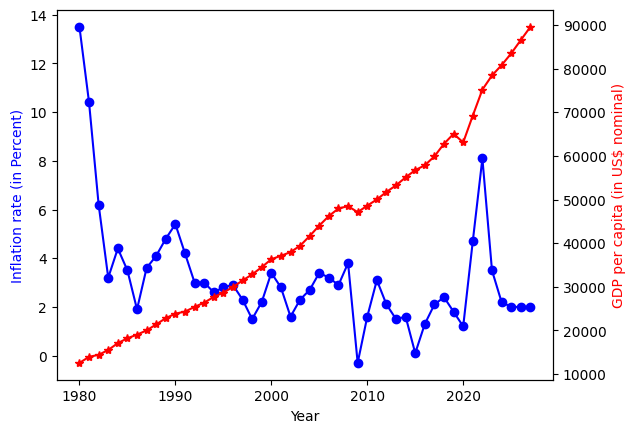

In [35]:
def Multi_lineGraph(dataframe: pd.DataFrame, Eje_y_derecho: str,
                    Eje_y_izq: str, Eje_x: str) -> plt.show:
    """
    Crea un gráfico de líneas con dos ejes verticales para visualizar dos variables en función de una tercera variable.

    Parameters:
    -----------
    dataframe: pd.DataFrame
        El DataFrame que contiene los datos a visualizar.
    Eje_y_derecho: str
        El nombre de la variable que se mostrará en el eje y derecho del gráfico.
    Eje_y_izq: str
        El nombre de la variable que se mostrará en el eje y izquierdo del gráfico.
    Eje_x: str
        El nombre de la variable que se mostrará en el eje x del gráfico.

    Returns:
    --------
    None
        La función muestra el gráfico, pero no devuelve nada.

    Examples:
    ---------
    >>> Multi_lineGraph(df, 'Variable1', 'Variable2', 'Variable3')
    """
    fig, axes = plt.subplots()
    axes.plot(dataframe[Eje_x], dataframe[Eje_y_izq], color='b', marker='o')
    axes.set_xlabel(f'{Eje_x}')
    axes.set_ylabel(f'{Eje_y_izq}', color='b')
    twin_axes = axes.twinx()
    twin_axes.plot(dataframe[Eje_x], dataframe[Eje_y_derecho], color='r', marker='*')
    twin_axes.set_ylabel(f'{Eje_y_derecho}', color='r')
    return plt.show()
Multi_lineGraph(df, 'GDP per capita (in US$ nominal)', 'Inflation rate (in Percent)', 'Year')

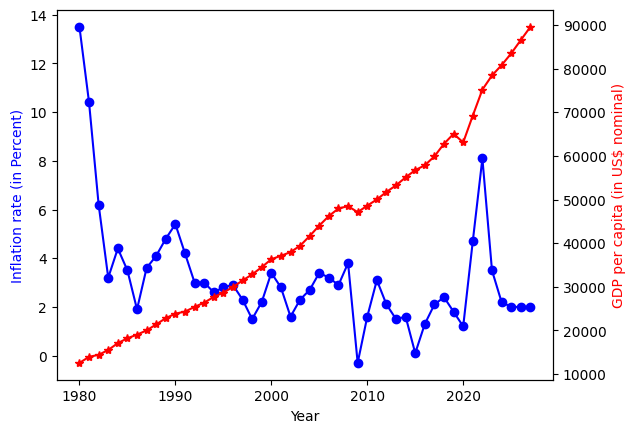

In [36]:
Multi_lineGraph(df, 'GDP per capita (in US$ nominal)', 'Inflation rate (in Percent)', 'Year')